# Evolutionarily Stable Strategy Example: The Hawk Dove Game

## Introduction to ESSs

Creating a simulation environment for exploring an ESS.

A behaviour that, if almost every member of the population does it, a mutant behaviour won't do as well as those behaviours that are already present in the population. That is, their strategy is no more beneficial than just following along with the existing strategy.

Recall that a 'strategy' is a pre-programmed behaviour, not a consciously-determined one. Further, a strategy needn't be unbeatable, but resistant to invading strategies.

## Situation

The following situation is based on the example given by Richard Dawkins in The Selfish Gene (specifically, the 1989 edition).

Hawks and doves are the only members of a population. Hawks will fight anyone til seriously injured. Doves will never fight anyone, but will posture at another dove without causing harm (subsequently wasting time), until one backs down or tires. A hawk will always scare off a dove - the hawk will not sustain injury nor will the dove have wasted any time as it escapes quickly. A hawk will always fight a hawk to the death, or seriously injured.

These are quantified as...

|Situation|Points Awarded|
|---|---|
|+50|Wins a fight|
|+0|Loses a fight|
|-100|Seriously injured in a fight|
|-10|Wasting time in posturing contest|

### Calculating Average Payoffs: All Doves Strategy

If all the population are doves, fights do have a winner and a loser. The winner gains +50 points for winning but gets -10 points for the time taken in the posturing contest, resulting in a 40 point total.

The losing dove scored +0 points for losing, and also gets -10 for wasting time.

On average any dove can expect to win 50% of the time (in this simple case). Given this, the average of matchups resulting in +40 points and -10 points is **+15 points as an average payoff for an all-dove strategy.**

### Mutation: One Hawk Among Doves, and All Hawks Strategy

In this scenario, a single hawk is introduced. The hawk will win every fight in which it engages, so long as the only opponents are doves - giving him a +50 average total. Given this, his genes will spread through the population.

However, after his genes have spread far enough, his average point total will decrease as he will begin to encounter other hawks. If his genes spread to constitute 100% of the population, every fight will be with another hawk. Hawks can expect to win their fights 50% of the time, as doves did against one another, which gives an average between the +50 win and -100 serious injury during loss situations as a **-25 point average payoff when encountering an all-hawk strategy.**

### Mutation: One Dove Among Hawks

To bring the cycle home, a single dove being introduced to the population changes things. The dove will always lose a fight to a hawk (-10 point outcome) but will never be seriously injured, nor will waste time in a posturing contest. This gives the single dove a **-10 point average payoff, which is superior to the all-hawk -25 point average payoff.** As a result, dove genes will spread through the population.

Neither of the two extreme scenarios (all-dove and all-hawk) are stable strategies, since the introduction of a single member of the opposite group will see the spread of their genes.

## What is the ESS in this game?

Given the above, we may expect to see constant oscillations between hawks and doves, but Dawkins suggests that this is not the case - that *a particular ratio* of hawks and doves in the same population is evolutionarily stable. Given the numbers presented, this works out to be 41.67% (5/12) doves and 58.33% (7/12) hawks. In this situation, the **average payoff for a member of the population is 6.25**, and neither hawk nor dove genes are favoured over the other in the population; a change swinging to introduce more doves would be met with an eventual climb in hawks, which would drive down the ratio of dove genes, and vice versa.

How would we arrive at this conclusion (the stable ratio of doves and hawks) ourselves?

In [1]:
import logging
import random
import matplotlib.pyplot as plt
import numpy as np
import time
from enum import Enum, auto
from pprint import pprint

In [2]:
logging.basicConfig()
logging.getLogger().setLevel(logging.DEBUG)

In [3]:
def enable_debug():
    logging.getLogger().setLevel(logging.DEBUG)
    logging.debug(f'DEBUG logging enabled!')

def disable_debug():
    logging.getLogger().setLevel(logging.INFO)
    logging.debug(f'DEBUG logging disabled.')

In [4]:
class Member(Enum):
    Hawk = auto()
    Dove = auto()

In [5]:
enable_debug()

DEBUG:root:DEBUG logging enabled!


In [6]:
def create_population(n_doves: int, n_hawks: int):
    population = []
    for i in range(n_doves):
        population.append(Member.Dove)

    for i in range(n_hawks):
        population.append(Member.Hawk)
    
    n_population = len(population)
    ratio_doves = n_doves / n_population if n_population > 0.0 else 0.0
    ratio_hawks = n_hawks / n_population if n_population > 0.0 else 0.0
    
    logging.debug(
        f'Population: {n_doves} ({ratio_doves*100.0:.2f}%) doves, '\
        f'{n_hawks} ({ratio_hawks*100.0:.2f}%) hawks, {n_population} total')
    return population, ratio_doves, ratio_hawks

In [7]:
pop, ratio_doves, ratio_hawks = create_population(2,0)
pop

DEBUG:root:Population: 2 (100.00%) doves, 0 (0.00%) hawks, 2 total


[<Member.Dove: 2>, <Member.Dove: 2>]

In [8]:
def get_fight_result(likelihood_to_win: float = 0.5):
    return likelihood_to_win > random.uniform(0.0,1.0)

In [9]:
def fight(fighter_1: Member, fighter_2: Member):
    """
    Calculate likelihoods of victory and return the fight result.
    Returns a tuple of (payoff for fighter_1, payoff for fighter_2)
    """
    fighter_1_payoff = 0.0
    fighter_2_payoff = 0.0
    if fighter_1 == Member.Dove:
        logging.debug(f'Fighter_1 is a Dove.')
        if fighter_2 == Member.Dove:
            logging.debug(f'Dove facing off against a Dove.')
            # Likelihood of winning is 0.5 if both fighters are same type.
            won = get_fight_result(0.5)
            if won:
                fighter_1_payoff = 40  # +50 win -10 timewaste
                fighter_2_payoff = -10  # +0 lost -10 timewaste
            else:
                fighter_1_payoff = -10  # +50 win -10 timewaste
                fighter_2_payoff = 40  # +0 lost -10 timewaste
        elif fighter_2 == Member.Hawk:
            logging.debug(f'Dove facing off against a Hawk.')
            won = get_fight_result(0.0)
            if won:
                raise ValueError(f'Dove should never be able to win against a Hawk.')
            else:
                fighter_1_payoff = 0  # +0 lost, didn't waste any time
                fighter_2_payoff = 50  # +50 win, no injury
        else:
            raise ValueError(f'Fighter_2 unrecognized fighter type?')
    elif fighter_1 == Member.Hawk:
        logging.debug(f'Fighter_1 is a Hawk.')
        if fighter_2 == Member.Hawk:
            logging.debug(f'Hawk facing off against a Hawk.')
            won = get_fight_result(0.5)
            if won:
                fighter_1_payoff = 50  # +50 won, no injury
                fighter_2_payoff = -100  # +0 lost -100 injured
            else:
                fighter_1_payoff = -100  # +0 lost -100 injured
                fighter_2_payoff = 50  # +50 won, no injury
        elif fighter_2 == Member.Dove:
            logging.debug(f'Hawk facing off against a Dove.')
            won = get_fight_result(1.0)
            if won:
                fighter_1_payoff = 50
                fighter_2_payoff = 0
            else:
                raise ValueError(f'Hawk should never lose against a Dove.')
        else:
            raise ValueError(f'Fighter_2 unrecognized fighter type?')
        
    else:
         raise ValueError(f'Fighter_1 unrecognized fighter type?')   
    return fighter_1_payoff, fighter_2_payoff

# Test:
fight(Member.Hawk, Member.Dove)

DEBUG:root:Fighter_1 is a Hawk.
DEBUG:root:Hawk facing off against a Dove.


(50, 0)

In [10]:
disable_debug()

In [11]:
def calculate_average_payoffs(population: list):
    payoff_history_doves = []
    payoff_history_hawks = []
    
    if len(population) <= 1:
        logging.warning(f'Population of size {len(population)} will return 0.0 payoffs as no fights occur.')
    
    for ix in range(len(population)):
        candidate = population[ix]
        logging.debug(f'==== Fighter #{ix}: A {candidate.name}')
        for inner_ix in range(len(population)):
            if ix == inner_ix:
                # Can't fight himself.
                continue
            contender = population[inner_ix]
            fighter_1_result, fighter_2_result = fight(candidate, contender)
            logging.debug(f'Fighting {inner_ix} {contender.name}: {fighter_1_result} vs {fighter_2_result}')
            if candidate == Member.Dove:
                payoff_history_doves.append(fighter_1_result)
            elif candidate == Member.Hawk:
                payoff_history_hawks.append(fighter_1_result)
            else:
                raise ValueError(f'candidate unrecognized type?')
            if contender == Member.Dove:
                payoff_history_doves.append(fighter_2_result)
            elif contender == Member.Hawk:
                payoff_history_hawks.append(fighter_2_result)
            else:
                raise ValueError(f'contender unrecognized type?')
    if not payoff_history_doves:
        payoff_history_doves = [0.0]
    if not payoff_history_hawks:
        payoff_history_hawks = [0.0]
    return {
        'doves_avg_payoff': np.average(payoff_history_doves), 
        'hawks_avg_payoff': np.average(payoff_history_hawks),
    }


# Test:
calculate_average_payoffs(create_population(2,2)[0])

{'doves_avg_payoff': 5.0, 'hawks_avg_payoff': 25.0}

In [12]:
def fights_at_this_iteration(total_participants: int) -> int:
    return total_participants * (total_participants - 1)

In [13]:
def total_number_of_fights_so_far(n_doves: int, granularity: int) -> int:
    """
    The number of fights that occurred in this iteration
    follows $n * (n-1)$ where $n$ is the total number of
    participants. From this we can determine how many 
    fights have happened up to this point.
    
    `granularity` is used instead of `n_hawks` because this is 
    only calculated after the current `n_doves` iteration has been 
    completed. For each `n_dove` iteration, we go through every 
    possible number of `n_hawk` that it could encounter.
    """
    total_fights = 0
    for n_dove in range(0, n_doves+1):
        for n_hawk in range(0, granularity):
            pop = n_dove + n_hawk
            fights_this_iter = fights_at_this_iteration(pop)
            total_fights += fights_this_iter
            logging.debug(f'{n_dove} doves + {n_hawk} hawks ({pop}) had {fights_this_iter}, total {total_fights}')
    return total_fights

In [14]:
def fights_and_time_remaining(
    time_taken_til_now_sec: float, 
    n_doves: int,
    granularity: int
):
    """
    Find how many fights have occurred, how many are remaining, and determine how
    much longer we have to wait for those to finish.
    """
    fights_so_far = total_number_of_fights_so_far(n_doves, granularity)
    total_fights_possible = total_number_of_fights_so_far(granularity, granularity)  # Max number of fights.
    remaining_fights = total_fights_possible - fights_so_far
    time_taken_per_fight = time_taken_til_now_sec / fights_so_far if fights_so_far > 0 else 0.0
    remaining_time = remaining_fights * time_taken_per_fight
    logging.debug(f'remaining_time: {remaining_time:.2f}sec, fights_so_far: {fights_so_far}/{total_fights_possible}')
    return remaining_time, remaining_fights, fights_so_far

In [15]:
# Let's try running many simulations and plotting the results.
def ess_explorer(granularity: int = 10):
    if granularity >= 200:
        logging.warning(f'This is going to take literal ages to finish. You likely want a lower granularity.')
    ess_exploration = {}
    timing_history = []
    tic = time.time()
    for n_doves in range(0, granularity):
        for n_hawks in range(0, granularity):
            population, ratio_doves, ratio_hawks = create_population(n_doves, n_hawks)
            # For data cleanliness in plotting, remove situations where population is 1 or less.
            if len(population) <= 1:
                continue
            # Instantiate n_doves entry if it doesn't exist, else store itself.
            # This prevents keys with no values.
            ess_exploration[n_doves] = ess_exploration.get(n_doves, {})
            avg_payoffs_results = calculate_average_payoffs(population)
            avg_payoffs_results['ratio_doves'] = ratio_doves
            avg_payoffs_results['ratio_hawks'] = ratio_hawks
            ess_exploration[n_doves][n_hawks] = avg_payoffs_results
        toc = time.time() - tic
        estimated_time_remaining_sec, remaining_fights, fights_so_far = fights_and_time_remaining(
            time_taken_til_now_sec=toc, 
            n_doves=n_doves, 
            granularity=granularity
        )
        remaining_iterations = granularity - n_doves
        logging.info(f'Remaining time: ~{estimated_time_remaining_sec:.2f}sec '\
                     f'Fights that have occurred: {fights_so_far} Remaining fights: {remaining_fights}')
    return ess_exploration

In [16]:
# Find the delta between the payoffs at each stage, then we'll plot them.
true_tic = time.time()
ess_search_results = ess_explorer(granularity = 100)
true_toc = time.time() - true_tic
logging.info(f'Actually took {true_toc:.2f}sec.')

INFO:root:Remaining time: ~491.26sec Fights that have occurred: 323400 Remaining fights: 115665000
INFO:root:Remaining time: ~488.32sec Fights that have occurred: 656700 Remaining fights: 115331700
INFO:root:Remaining time: ~485.59sec Fights that have occurred: 1000100 Remaining fights: 114988300
INFO:root:Remaining time: ~483.44sec Fights that have occurred: 1353800 Remaining fights: 114634600
INFO:root:Remaining time: ~482.44sec Fights that have occurred: 1718000 Remaining fights: 114270400
INFO:root:Remaining time: ~481.13sec Fights that have occurred: 2092900 Remaining fights: 113895500
INFO:root:Remaining time: ~479.79sec Fights that have occurred: 2478700 Remaining fights: 113509700
INFO:root:Remaining time: ~478.74sec Fights that have occurred: 2875600 Remaining fights: 113112800
INFO:root:Remaining time: ~477.26sec Fights that have occurred: 3283800 Remaining fights: 112704600
INFO:root:Remaining time: ~475.33sec Fights that have occurred: 3703500 Remaining fights: 112284900
IN

INFO:root:Remaining time: ~150.12sec Fights that have occurred: 78908100 Remaining fights: 37080300
INFO:root:Remaining time: ~142.65sec Fights that have occurred: 80733800 Remaining fights: 35254600
INFO:root:Remaining time: ~135.09sec Fights that have occurred: 82586000 Remaining fights: 33402400
INFO:root:Remaining time: ~127.52sec Fights that have occurred: 84464900 Remaining fights: 31523500
INFO:root:Remaining time: ~119.80sec Fights that have occurred: 86370700 Remaining fights: 29617700
INFO:root:Remaining time: ~111.92sec Fights that have occurred: 88303600 Remaining fights: 27684800
INFO:root:Remaining time: ~103.96sec Fights that have occurred: 90263800 Remaining fights: 25724600
INFO:root:Remaining time: ~95.88sec Fights that have occurred: 92251500 Remaining fights: 23736900
INFO:root:Remaining time: ~87.72sec Fights that have occurred: 94266900 Remaining fights: 21721500
INFO:root:Remaining time: ~79.42sec Fights that have occurred: 96310200 Remaining fights: 19678200
INF

In [17]:
def get_ess_deltas(ess_search_results: dict):
    """
    Return a map we can use to analyze and plot the results.
    """
    ratios_doves = []
    ratios_hawks = []
    payoff_deltas = []
    doves_avg_payoffs = []
    hawks_avg_payoffs = []
    for n_doves,n_doves_details in ess_search_results.items():
        for n_hawks, n_hawks_details in n_doves_details.items():
            doves_avg_payoff = n_hawks_details['doves_avg_payoff']
            hawks_avg_payoff = n_hawks_details['hawks_avg_payoff']
            delta = np.abs(doves_avg_payoff - hawks_avg_payoff)
            ratios_doves.append(n_hawks_details['ratio_doves'])
            ratios_hawks.append(n_hawks_details['ratio_hawks'])
            doves_avg_payoffs.append(doves_avg_payoff)  # Kind of redundant but useful for analysis later.
            hawks_avg_payoffs.append(hawks_avg_payoff)
            payoff_deltas.append(delta)
    return {
        'ratios_doves': ratios_doves,
        'ratios_hawks': ratios_hawks,
        'payoff_deltas': payoff_deltas,
        'doves_avg_payoffs': doves_avg_payoffs,
        'hawks_avg_payoffs': hawks_avg_payoffs,
    }

# Test:
get_ess_deltas({
    10: {
        9: {
            'doves_avg_payoff': 1.0,
            'hawks_avg_payoff': 1.5,
            'ratio_doves': 0.70,
            'ratio_hawks': 0.60
        }
    }
})

{'ratios_doves': [0.7],
 'ratios_hawks': [0.6],
 'payoff_deltas': [0.5],
 'doves_avg_payoffs': [1.0],
 'hawks_avg_payoffs': [1.5]}

In [18]:
ess_adjacency_list = get_ess_deltas(ess_search_results)

<Figure size 432x288 with 0 Axes>

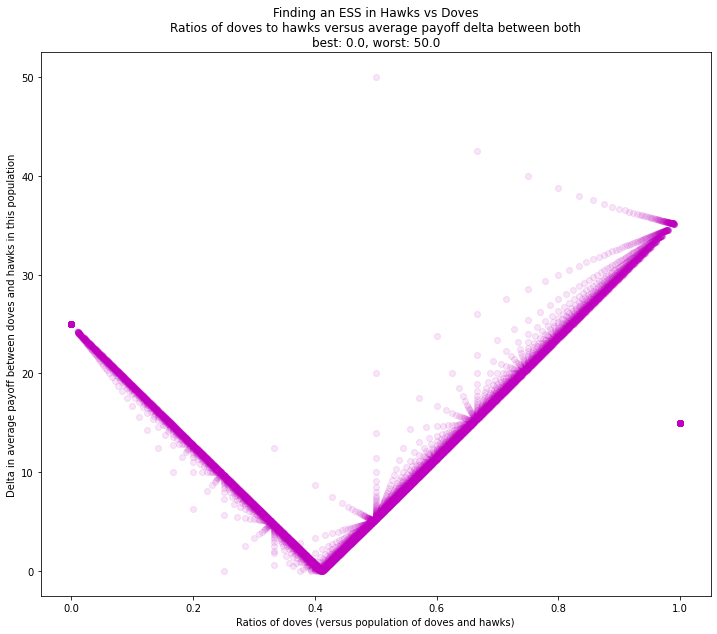

In [26]:
# We can plot this as a 2D plot since we know 1.0 - ratios_doves = ratios_hawks.
# Having both ratios doesn't add new information when looking at payoff deltas, 
# so won't try to use a 3D plot here.
def show(ess_adjacency_list: dict):
    x = ess_adjacency_list['ratios_doves']
    y = ess_adjacency_list['payoff_deltas']
    plt.clf()
    fig = plt.figure(figsize=(12,10))
    fig.patch.set_facecolor('white')
    plt.scatter(x, y, c='m', alpha=.1)
    plt.xlabel(f'Ratios of doves (versus population of doves and hawks)')
    plt.ylabel(f'Delta in average payoff between doves and hawks in this population')
    plt.title(f'Finding an ESS in Hawks vs Doves\n'\
              f'Ratios of doves to hawks versus average payoff delta between both\n'\
              f'best: {min(y)}, worst: {max(y)}')
    plt.show()

show(ess_adjacency_list)

There is a pretty clear trend toward a particular ratio of doves being optimally stable. We'll find all the cases where the delta was ~0.0, and find the most common ratios present among them to find what ratio this is.

In [27]:
def filter_to_payoffs_below(ess_adjacency_list: dict, this_threshold: float = 0.1):
    r_doves = ess_adjacency_list['ratios_doves']
    r_hawks = ess_adjacency_list['ratios_hawks']
    payoff_deltas = ess_adjacency_list['payoff_deltas']
    payoffs_doves = ess_adjacency_list['doves_avg_payoffs']
    payoffs_hawks = ess_adjacency_list['hawks_avg_payoffs']
    filtered = list(filter(lambda x: x[0] < this_threshold, zip(payoff_deltas, r_doves, r_hawks, payoffs_doves, payoffs_hawks)))
    return {
        'payoff_deltas': [x[0] for x in filtered],
        'ratios_doves': [x[1] for x in filtered],
        'ratios_hawks': [x[2] for x in filtered],
        'payoffs_doves': [x[3] for x in filtered],
        'payoffs_hawks': [x[4] for x in filtered],
    }

In [28]:
near_equal_payoffs = filter_to_payoffs_below(ess_adjacency_list, this_threshold=0.2)

In [29]:
def best_payoffs_and_ratios(near_equal_payoffs: dict):
    """
    Doves-specific graphing.
    """
    plt.clf()
    plt.figure(figsize=(12,10))
    fig, ax1 = plt.subplots(figsize=(12,10))
    
    x = near_equal_payoffs['ratios_doves']
    y1 = near_equal_payoffs['payoff_deltas']
    y2 = near_equal_payoffs['payoffs_doves']
    
    
    # Left axis: payoff deltas.
    ax1_colour = 'm'
    ax1.set_xlabel(f'Ratio of doves (versus population of doves and hawks)')
    ax1.set_ylabel(f'Payoff deltas between doves and hawks (lower is more stable)')
    ax1.scatter(x, y1, c=ax1_colour, alpha=0.2)
    ax1.tick_params(axis='y', labelcolor=ax1_colour)
    
    # Right axis: actual average payoff for doves.
    ax2_colour = 'g'
    ax2 = ax1.twinx()
    ax2.set_ylabel(f'Average payoffs for doves')
    ax2.scatter(x, y2, c=ax2_colour, alpha=0.2)
    ax2.tick_params(axis='y', labelcolor=ax2_colour)
    
    fig.patch.set_facecolor('white')
    
    plt.title(f'Comparing the {len(x)} most stable ratios based on payoff deltas\n'\
              f'Average ratio across these payoff deltas: {np.average(x)}\n'\
              f'Average payoff delta: {np.average(y1):.2f}')
    plt.show()

In [30]:
def payoffs_from_doves_and_hawks(near_equal_payoffs: dict):
    plt.clf()
    plt.figure(figsize=(12,10))
    fig, ax1 = plt.subplots(figsize=(12,10))
    
    x = near_equal_payoffs['ratios_doves']
    y1 = near_equal_payoffs['payoffs_hawks']
    y2 = near_equal_payoffs['payoffs_doves']
    
    
    # Left axis: payoff deltas.
    ax1_colour = 'm'
    ax1.set_xlabel(f'Ratio of doves (versus population of doves and hawks)')
    ax1.set_ylabel(f'Average payoffs for hawks')
    ax1.scatter(x, y1, c=ax1_colour, alpha=0.2)
    ax1.tick_params(axis='y', labelcolor=ax1_colour)
    
    # Right axis: actual average payoff for doves.
    ax2_colour = 'g'
    ax2 = ax1.twinx()
    ax2.set_ylabel(f'Average payoffs for doves')
    ax2.scatter(x, y2, c=ax2_colour, alpha=0.2)
    ax2.tick_params(axis='y', labelcolor=ax2_colour)
    
    fig.patch.set_facecolor('white')
    
    plt.title(f'Comparing the average payoffs between hawks and doves at near-stable ratios\n'\
              f'Average hawk payoff: {np.average(y1):.2f}\n'\
              f'Average dove payoff: {np.average(y2):.2f}')
    plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 864x720 with 0 Axes>

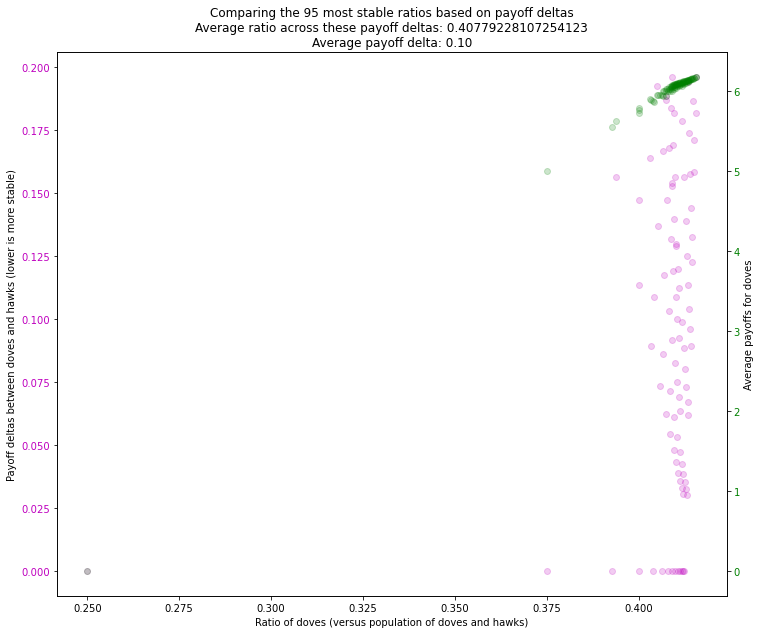

In [31]:
best_payoffs_and_ratios(near_equal_payoffs)

<Figure size 432x288 with 0 Axes>

<Figure size 864x720 with 0 Axes>

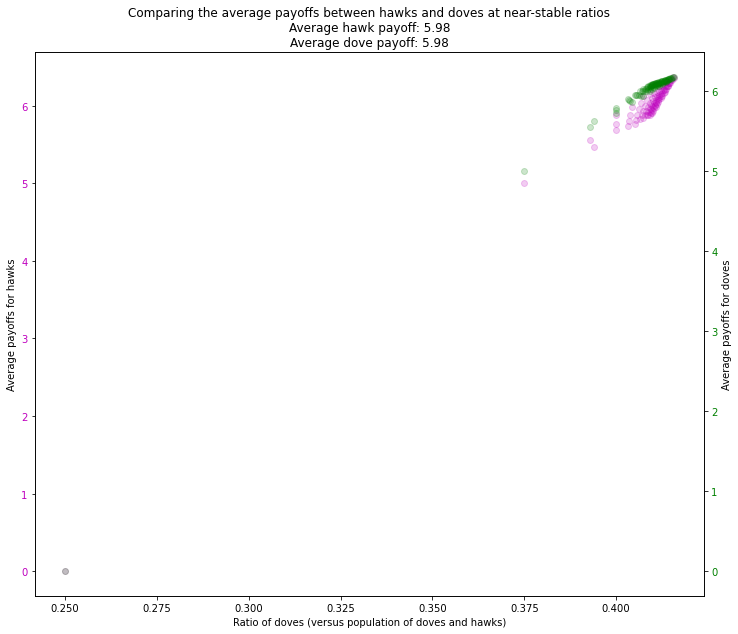

In [32]:
payoffs_from_doves_and_hawks(near_equal_payoffs)

From the final two graphs, we see that the ratios of doves that produce payoffs nearly-equal (or exactly equal) between both doves and hawks converge around ~40.88% doves.

## Summarizing the Findings

In conclusion, we find that the average ratio of doves in the dove+hawk population, given the scoring system and likelihoods of winning fights between each possible matchup, to be ~40.88% doves and ~59.12% hawks. This produced an average payoff delta of 0.24, meaning oscillations between higher and lower ratios for doves versus hawks are miniscule.

### Opportunities for Improvement

This simulation was made in a scrappy way to facilitate my learning of ESSs, and as such has a couple inefficiencies:

It is worth noting that the simulation can be made much faster by not trying populations of growing size, but rather a single population of a fixed size. I set up the simulation in this manner to show the results from various population sizes and population balances, rather than just population balances.

Further, the use of a uniform random distribution in determining whether a particular fight resulted in a win or loss is likely unnecessary for this particular task, since we can simply average between all expected outcomes.

The simulation as it stands has every member of a given population face off against every other member of the population twice: once when it faces off as a candidate (`fighter_1`) and once as a contender (`fighter_2`). This should not be a problem with respect to the accuracy of the experiment, but is a problem in terms of unnecessary extra compute cycles.

## License

```
   Copyright 2020 Joseph James Greene

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at

       http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.
```

****
